In [13]:
import torch
import torch.nn as nn
from torcheval.metrics import R2Score
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt



### Create dataset and visualize

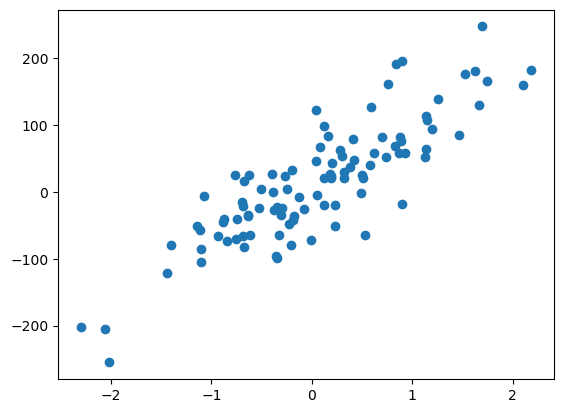

In [14]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=50, random_state=1)

plt.scatter(x_numpy,y_numpy)

In [15]:
X = torch.from_numpy(x_numpy.astype(np.float32)) # covert to float32
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1) #reshape

print("X is shape {},{}".format(X.shape[0],X.shape[1]))
print("y is shape {},{}".format(y.shape[0],y.shape[1]))

n_samples, n_features = X.shape[0], X.shape[1]
out_size = 1

X is shape 100,1
y is shape 100,1


### Model

In [16]:
#1) model
model = nn.Linear(in_features=n_features, out_features=out_size)
learning_rate = 0.01
#2) loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#3) training loop
num_epochs = 60000
for epoch in range(num_epochs):
    #forward pass and loss
    y_pred = model(X)
    l = loss(y_pred, y)

    l.backward()

    optimizer.step()
    optimizer.zero_grad()

    print("epoch:{},loss:{} ".format(epoch, l.item()))



epoch:0,loss:7973.20556640625 
epoch:1,loss:7782.73046875 
epoch:2,loss:7598.490234375 
epoch:3,loss:7420.2763671875 
epoch:4,loss:7247.890625 
epoch:5,loss:7081.13818359375 
epoch:6,loss:6919.8330078125 
epoch:7,loss:6763.794921875 
epoch:8,loss:6612.84814453125 
epoch:9,loss:6466.8251953125 
epoch:10,loss:6325.5625 
epoch:11,loss:6188.90380859375 
epoch:12,loss:6056.69580078125 
epoch:13,loss:5928.7919921875 
epoch:14,loss:5805.04931640625 
epoch:15,loss:5685.33203125 
epoch:16,loss:5569.50634765625 
epoch:17,loss:5457.4443359375 
epoch:18,loss:5349.021484375 
epoch:19,loss:5244.119140625 
epoch:20,loss:5142.62109375 
epoch:21,loss:5044.41357421875 
epoch:22,loss:4949.39111328125 
epoch:23,loss:4857.447265625 
epoch:24,loss:4768.48193359375 
epoch:25,loss:4682.39697265625 
epoch:26,loss:4599.09716796875 
epoch:27,loss:4518.49267578125 
epoch:28,loss:4440.494140625 
epoch:29,loss:4365.015625 
epoch:30,loss:4291.97607421875 
epoch:31,loss:4221.29541015625 
epoch:32,loss:4152.8955078125

### visualize

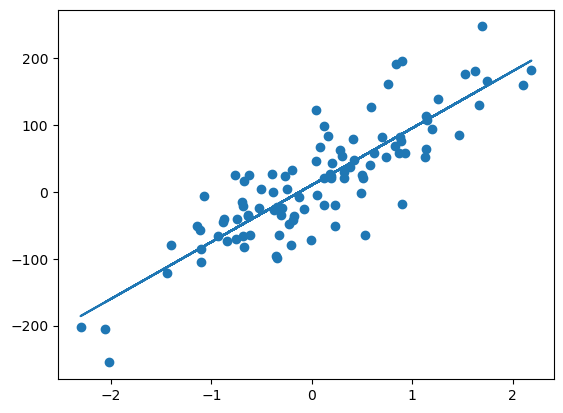

In [17]:
y_pred = model(X)
y_pred = y_pred.detach() #no require gradient
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

### R2Score


In [18]:
metric = R2Score()
metric.update(y_pred, y)
metric.compute()

tensor(0.7321)